In [1]:
%load_ext autoreload

%autoreload 2

In [3]:
from pyoaz.models import create_tic_tac_toe_model
from pyoaz.self_play import SelfPlay
import tensorflow as tf
from pyoaz.games.tic_tac_toe.viz import view_board
import numpy  as np
from tensorflow.keras.models import load_model
import tensorflow.compat.v1.keras.backend as K

def load_graph(file_name):
    with tf.gfile.GFile(file_name, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="")

    return graph


# Watch a Random Network play

In [2]:
model = create_tic_tac_toe_model(3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2020-08-03 21:34:49 WARNING  From /home/simon/anaconda3/envs/oaz-gpu/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
self_play = SelfPlay(
    "tic_tac_toe",
    search_batch_size=1,
    n_games_per_worker=1,
    n_simulations_per_move=1,
    n_search_worker=1,
    n_threads=1,
    evaluator_batch_size=1,
    epsilon=0.0,
    alpha=0.0,
)

In [5]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    dataset = self_play.self_play(sess)

2020-08-03 21:23:42 INFO     Starting thread 0
/home/simon/anaconda3/envs/oaz-gpu/lib/python3.6/site-packages/pyoaz/self_play.py:167: RuntimeWarning: invalid value encountered in true_divide
  policy = policy / (self.n_simulations_per_move - 1)


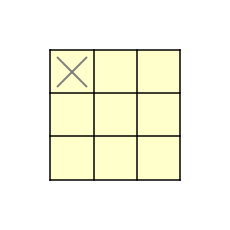

In [6]:
view_board(dataset["Boards"][0])

# Train the model to always play move 6 from the empty board

In [16]:
N_GAMES = 10000
boards = np.zeros(shape=(N_GAMES, 3, 3, 2))
policies = np.zeros(shape=(N_GAMES, 9))
policies[:, 6] = 1.
values = np.zeros(shape=(N_GAMES))

In [17]:
model.compile(
    loss={
        "policy": "categorical_crossentropy",
        "value": "mean_squared_error",
    },
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
)
model.fit(
    boards,
    {"value": values, "policy": policies},
    batch_size=64,
    epochs=100,
    verbose=1,
    # callbacks=[early_stopping],
)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 126us/sample - loss: 1.1430 - policy_loss: 1.1348 - value_loss: 0.0000e+00
Epoch 2/100
10000/10000 [==============================] - 1s 74us/sample - loss: 0.2533 - policy_loss: 0.2528 - value_loss: 0.0000e+00
Epoch 3/100
10000/10000 [==============================] - 1s 74us/sample - loss: 0.0998 - policy_loss: 0.0997 - value_loss: 0.0000e+00
Epoch 4/100
10000/10000 [==============================] - 1s 75us/sample - loss: 0.0552 - policy_loss: 0.0551 - value_loss: 0.0000e+00
Epoch 5/100
10000/10000 [==============================] - 1s 76us/sample - loss: 0.0357 - policy_loss: 0.0356 - value_loss: 0.0000e+00
Epoch 6/100
10000/10000 [==============================] - 1s 76us/sample - loss: 0.0252 - policy_loss: 0.0252 - value_loss: 0.0000e+00
Epoch 7/100
10000/10000 [==============================] - 1s 75us/sample - loss: 0.0189 - policy_loss: 0.0188 - value_loss: 0.0000e+00
Epoch 8/100
10000/10000 

In [18]:
model.save('./overfit_model.pb')

# Does the overfit model now play move 6? 

In [4]:
# overfit_model = load_model('./overfit_model.pb')
graph = load_graph('./overfit_model.pb')

/home/simon/anaconda3/envs/oaz-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Unexpected end-group tag: Not all data was converted
  if sys.path[0] == '':


In [5]:
# Weird that I need to pass the graph? I don't do this in the training script...
with tf.Session(graph=graph) as sess:

    overfit_model = load_model('./overfit_model.pb')
    #     sess.run(tf.global_variables_initializer())
    K.set_session(sess)

    self_play = SelfPlay(
        "tic_tac_toe",
        search_batch_size=1,
        n_games_per_worker=10,
        n_simulations_per_move=1,
        n_search_worker=1,
        n_threads=1,
        evaluator_batch_size=1,
        epsilon=0.0,
        alpha=0.0,
    )

    dataset = self_play.self_play(sess)

    pred = overfit_model.predict(np.zeros((1,3,3,2)))[0][0].tolist()
pred

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2020-08-04 15:58:08 WARNING  From /home/simon/anaconda3/envs/oaz-gpu/lib/python3.6/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2020-08-04 15:58:08 WARNING  From /home/simon/anaconda3/envs/oaz-gpu/lib/python3.6/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2020-08-04 15:58:08 WARNING  From /home/simon/anaconda3/envs/oaz-gpu/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-08-04 15:58:09 INFO     Starting thread 0
/home/simon/anaconda3/envs/oaz-gpu/lib/python3.6/site-packages/pyoaz/self_play.py:170: RuntimeWarning: invalid value encountered in true_divide
  policy = policy / (self.n_simulations_per_move - 1)


[3.5789295793620113e-07,
 3.5789295793620113e-07,
 3.5789295793620113e-07,
 3.5789295793620113e-07,
 3.5789295793620113e-07,
 3.5789295793620113e-07,
 0.9999971389770508,
 3.5789295793620113e-07,
 3.5789295793620113e-07]

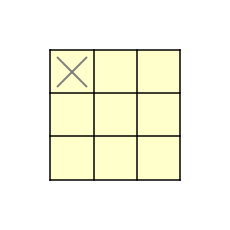

In [6]:
# The agent still plays move 0....
view_board(dataset["Boards"][0])